<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E9%82%8F%E8%BC%AF%E8%BF%B4%E6%AD%B8/%E8%AA%AA%E6%98%8E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=38f08bf55be91d4a389938e514d34a96bdf2cfc87debc3873c3f281efa89edb5
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [2]:

import wget

wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

'ChineseFont.ttf'

## 什麼是邏輯分類 (Logistic Classification)?

邏輯迴歸是一種用於**二元分類 (Binary Classification)** 問題的統計模型。簡單來說，它的目標是預測一個觀察值屬於兩個類別中的哪一個（例如：是/否、成功/失敗、垃圾郵件/非垃圾郵件）。

與線性迴歸試圖預測一個連續值不同，邏輯迴歸預測的是一個**機率**，表示觀察值屬於某個特定類別的可能性。

想像一下我們有一些數據點，屬於兩個不同的群組。邏輯分類的目標就是找到一條線（或在高維度下是一個超平面），能夠最好地將這兩個群組分開。這條線就叫做**決策邊界 (Decision Boundary)**。

以下圖例展示了簡單的二維分類情況：

(100, 2)
(100,)


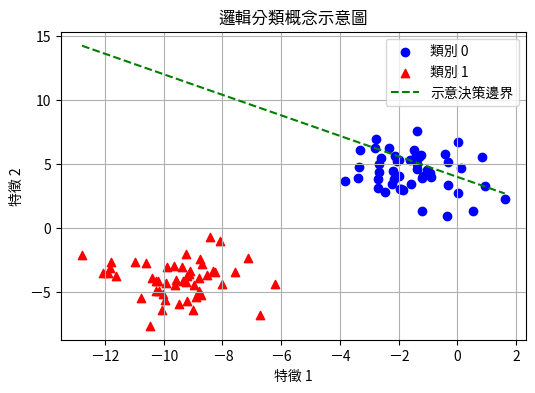

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")
# 生成兩群數據點
#n_samples: 總共300個樣本
#centers: 2個類別
#n_features: 每個樣本有2個特徵
#random_state: 隨機種子，確保每次生成的數據相同
#cluster_std: 每個類別的標準差，控制數據點的分散程度

X_cls, y_cls = make_blobs(n_samples=100, centers=2, n_features=2,
                  random_state=1, cluster_std=1.5)
print(X_cls.shape)
print(y_cls.shape)

#X_cls[y_cls==0]的意思是從X_cls中選擇y_cls等於0的行
#y_cls==0的意思是從y_cls中選擇y_cls等於0的行

# 繪製散點圖
plt.figure(figsize=(6, 4))
plt.scatter(X_cls[y_cls == 0][:, 0], X_cls[y_cls == 0][:, 1], marker='o', color='blue', label='類別 0')
plt.scatter(X_cls[y_cls == 1][:, 0], X_cls[y_cls == 1][:, 1], marker='^', color='red', label='類別 1')

# 假設一條簡單的決策邊界 (僅為示意)
x_boundary = np.linspace(X_cls[:, 0].min(), X_cls[:, 0].max(), 100)
y_boundary = -0.8 * x_boundary + 4 # 隨意畫一條線
plt.plot(x_boundary, y_boundary, color='green', linestyle='--', label='示意決策邊界')

plt.title('邏輯分類概念示意圖')
plt.xlabel('特徵 1')
plt.ylabel('特徵 2')
plt.legend()
plt.grid(True)
plt.show()



### 常見應用場景
1. 測試分類算法
2. 教學演示
3. 模型效能評估
4. 數據可視化示例

`make_blobs()` 是一個非常實用的函數，特別適合用於：
- 快速生成測試數據
- 驗證分類算法的效果
- 教學示範分類問題
- 演示機器學習概念

## Sigmoid 函數 (S型函數)

為了將線性模型的輸出轉換成介於 0 和 1 之間的機率值，邏輯迴歸使用了 **Sigmoid 函數** (也稱為 Logistic 函數)。

其數學公式為：
$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
其中 'z' 通常是線性模型的輸出 (例如： $z = w_1x_1 + w_2x_2 + ... + w_nx_n + b$ )。

**Sigmoid 函數的特性：**
- **輸出範圍：** 無論輸入 'z' 是什麼值（正數、負數或零），輸出 $\sigma(z)$ 的值永遠介於 0 和 1 之間。
- **S 型曲線：** 函數圖形呈現 S 形狀。
- **機率解釋：** 輸出的值可以被解釋為樣本屬於「正類別」（通常標記為 1）的機率。例如，如果輸出是 0.8，表示模型預測該樣本有 80% 的機率屬於正類別。
- **決策閾值：** 通常我們會設定一個閾值（例如 0.5）。如果 Sigmoid 輸出大於閾值，我們就將樣本分類為正類別 (1)；如果小於閾值，則分類為負類別 (0)。

以下圖表展示了 Sigmoid 函數的形狀：

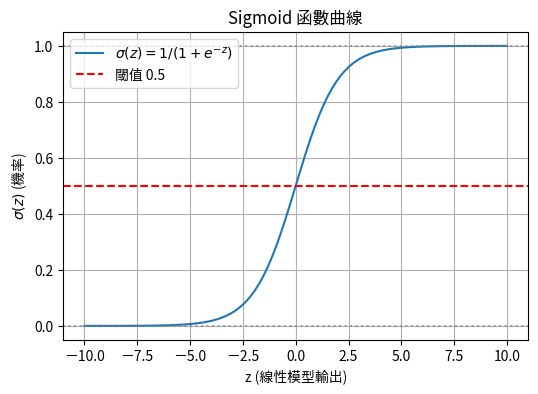

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 定義 Sigmoid 函數
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# 產生輸入值 z
z = np.linspace(-10, 10, 100)
# 計算對應的 Sigmoid 輸出值
sigma_z = sigmoid(z)

# 繪製 Sigmoid 函數曲線
plt.figure(figsize=(6, 4))
plt.plot(z, sigma_z, label=r'$\sigma(z) = 1 / (1 + e^{-z})$')
plt.axhline(y=0.5, color='red', linestyle='--', label='閾值 0.5')
plt.axhline(y=1.0, color='gray', linestyle=':', alpha=0.7)
plt.axhline(y=0.0, color='gray', linestyle=':', alpha=0.7)
plt.title('Sigmoid 函數曲線')
plt.xlabel('z (線性模型輸出)')
plt.ylabel(r'$\sigma(z)$ (機率)')
plt.legend()
plt.grid(True)
plt.show()

## 邏輯分類有2種

- LogisticRegression

- LinearSVC

### 1. 演算法原理

- **LogisticRegression (邏輯迴歸)**

  - 使用 sigmoid 函數將線性輸出轉換為機率值 (0~1)

  - 使用最大似然估計(Maximum Likelihood Estimation)來最佳化參數

  - 輸出結果為機率值



- **LinearSVC (線性支持向量分類)**

  - 尋找能將不同類別最佳分離的超平面(hyperplane)

  - 著重在最大化類別之間的邊界(margin)

  - 輸出結果為硬分類(-1或1)

### 2. 主要特點比較

| 特性 | LogisticRegression | LinearSVC |
|:------:|:-------------------:|:------------:|
| 輸出形式 | 機率值 (0~1) | 硬分類 (-1或1) |
| 對離群值敏感度 | 較敏感 | 較不敏感 |
| 計算效率 | 較快 | 較慢 |
| 適用情境 | 需要機率輸出時 | 需要明確分類邊界時 |

### 3. 使用建議

- 當您需要知道分類的機率時，使用 LogisticRegression

- 當資料中有離群值，且需要較強的分類邊界時，使用 LinearSVC

- 當資料量較大時，LogisticRegression 的運算效率較佳

以下是一個簡單的程式碼範例來展示兩者的差異，並視覺化其決策邊界：

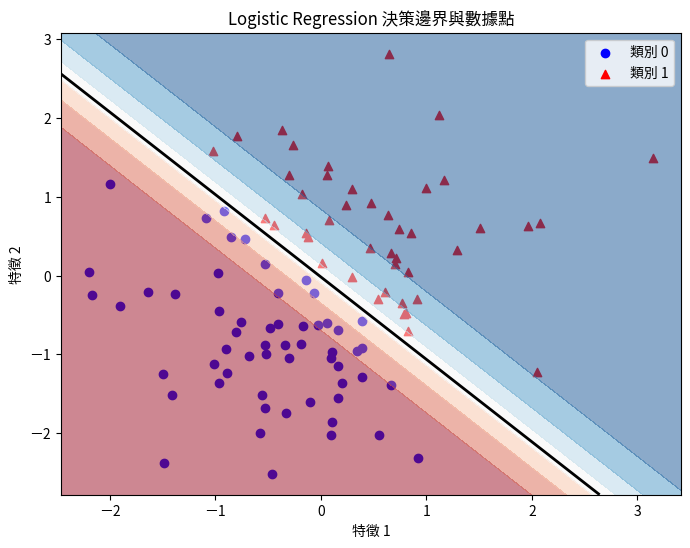

Logistic Regression 機率預測 (部分):
[[9.96795704e-01 3.20429550e-03]
 [9.97628682e-01 2.37131830e-03]
 [2.98977427e-02 9.70102257e-01]
 [9.80355955e-04 9.99019644e-01]
 [9.99921072e-02 9.00007893e-01]]

LinearSVC 分類預測 (部分):
[0 0 1 1 1]


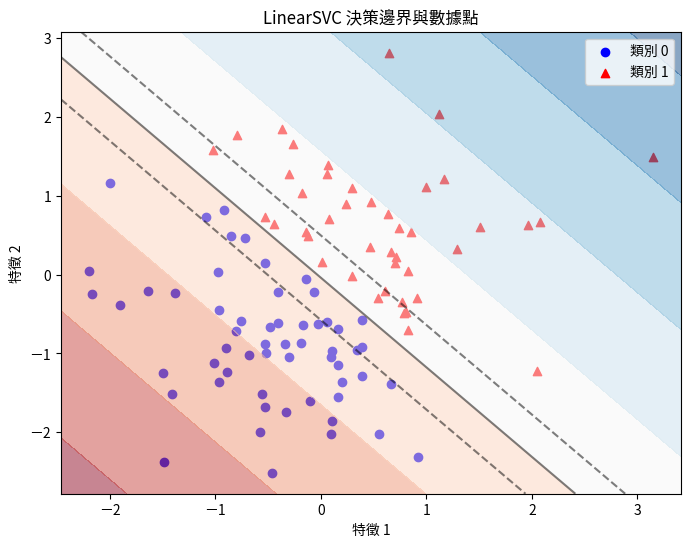

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt # Added import

# 建立範例資料
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# 邏輯迴歸
lr = LogisticRegression()
lr.fit(X, y)

# --- Added Visualization Code ---
plt.figure(figsize=(8, 6))
# 繪製數據點
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='o', color='blue', label='類別 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='^', color='red', label='類別 1')

# 繪製決策邊界
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 建立網格來評估模型
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# 繪製等高線圖 (顯示機率) 和決策邊界 (機率=0.5)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.5)
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='black')

plt.title('Logistic Regression 決策邊界與數據點')
plt.xlabel('特徵 1')
plt.ylabel('特徵 2')
plt.legend()
plt.show()
# --- End of Added Visualization Code ---


# 取得機率預測
lr_prob = lr.predict_proba(X)  # 輸出機率值
print("Logistic Regression 機率預測 (部分):")
print(lr_prob[:5]) # 只印出前5個

# 線性SVC
svc = LinearSVC(dual=True) # Added dual=True to avoid warning
svc.fit(X, y)
# 取得分類結果
svc_pred = svc.predict(X)  # 輸出分類標籤
print("\nLinearSVC 分類預測 (部分):")
print(svc_pred[:5]) # 只印出前5個

# --- Added LinearSVC Decision Boundary Visualization ---
plt.figure(figsize=(8, 6))
# 繪製數據點
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='o', color='blue', label='類別 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='^', color='red', label='類別 1')

# 繪製決策邊界
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 建立網格來繪製決策邊界
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 繪製決策邊界和邊界
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.5) # Color background based on decision function

plt.title('LinearSVC 決策邊界與數據點')
plt.xlabel('特徵 1')
plt.ylabel('特徵 2')
plt.legend()
plt.show()
# --- End of LinearSVC Visualization ---